In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/energy-consumption-generation-prices-and-weather/energy_dataset.csv
/kaggle/input/energy-consumption-generation-prices-and-weather/weather_features.csv


In [2]:
df1 = pd.read_csv('/kaggle/input/energy-consumption-generation-prices-and-weather/energy_dataset.csv')
df2= pd.read_csv('/kaggle/input/energy-consumption-generation-prices-and-weather/weather_features.csv')

In [3]:
 df1

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,...,277.0,0.0,3113.0,96.0,NaN,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,...,280.0,0.0,3288.0,51.0,NaN,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,...,286.0,0.0,3503.0,36.0,NaN,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,...,287.0,0.0,3586.0,29.0,NaN,3273.0,25450.0,25801.0,63.93,69.89


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object 
 15  weather_descripti

In [6]:
df1.isnull()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
35060,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
35061,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
35062,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [7]:

df1.isnull().sum()

time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                              

In [8]:
df1.shape

(35064, 29)

In [9]:
df2.shape

(178396, 17)

In [10]:
df2.isnull().sum()

dt_iso                 0
city_name              0
temp                   0
temp_min               0
temp_max               0
pressure               0
humidity               0
wind_speed             0
wind_deg               0
rain_1h                0
rain_3h                0
snow_3h                0
clouds_all             0
weather_id             0
weather_main           0
weather_description    0
weather_icon           0
dtype: int64

In [11]:
# drop columns with more than 50% missing values
thresh = len(df1) * 0.5 # calculate the threshold
df1.dropna(thresh=thresh, axis=1, inplace=True) # drop columns with less non-null values than the threshold

In [12]:
df1

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,49.0,196.0,0.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,50.0,195.0,0.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,50.0,196.0,0.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,50.0,191.0,0.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,42.0,189.0,0.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,...,85.0,277.0,0.0,3113.0,96.0,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,...,33.0,280.0,0.0,3288.0,51.0,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,...,31.0,286.0,0.0,3503.0,36.0,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,...,31.0,287.0,0.0,3586.0,29.0,3273.0,25450.0,25801.0,63.93,69.89


In [13]:
df1.shape

(35064, 27)

In [14]:
# store the names of the columns before the drop operation
cols_before_2 = df2.columns

# drop columns with more than 50% missing values
thresh = len(df2) * 0.5 # calculate the threshold
df2.dropna(thresh=thresh, axis=1, inplace=True) # drop columns with less non-null values than the threshold

# store the names of the columns after the drop operation
cols_after_2 = df2.columns

# compare the two lists of column names to find the dropped columns
dropped_cols_2 = list(set(cols_before_2) - set(cols_after_2))

In [15]:
df2.shape

(178396, 17)

In [16]:
df2

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178391,2018-12-31 19:00:00+01:00,Seville,287.760,287.150,288.150,1028,54,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178392,2018-12-31 20:00:00+01:00,Seville,285.760,285.150,286.150,1029,62,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178393,2018-12-31 21:00:00+01:00,Seville,285.150,285.150,285.150,1028,58,4,50,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178394,2018-12-31 22:00:00+01:00,Seville,284.150,284.150,284.150,1029,57,4,60,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [17]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,178396.0,289.618605,8.026199,262.24,283.670000,289.15,295.150000,315.600
temp_min,178396.0,288.330442,7.955491,262.24,282.483602,288.15,293.730125,315.150
temp_max,178396.0,291.091267,8.612454,262.24,284.650000,290.15,297.150000,321.150
pressure,178396.0,1069.260740,5969.631893,0.00,1013.000000,1018.00,1022.000000,1008371.000
humidity,178396.0,68.423457,21.902888,0.00,53.000000,72.00,87.000000,100.000
wind_speed,178396.0,2.470560,2.095910,0.00,1.000000,2.00,4.000000,133.000
wind_deg,178396.0,166.591190,116.611927,0.00,55.000000,177.00,270.000000,360.000
rain_1h,178396.0,0.075492,0.398847,0.00,0.000000,0.00,0.000000,12.000
rain_3h,178396.0,0.000380,0.007288,0.00,0.000000,0.00,0.000000,2.315
snow_3h,178396.0,0.004763,0.222604,0.00,0.000000,0.00,0.000000,21.500


In [18]:
df2.dtypes

dt_iso                  object
city_name               object
temp                   float64
temp_min               float64
temp_max               float64
pressure                 int64
humidity                 int64
wind_speed               int64
wind_deg                 int64
rain_1h                float64
rain_3h                float64
snow_3h                float64
clouds_all               int64
weather_id               int64
weather_main            object
weather_description     object
weather_icon            object
dtype: object

In [19]:
df1.describe

<bound method NDFrame.describe of                             time  generation biomass  \
0      2015-01-01 00:00:00+01:00               447.0   
1      2015-01-01 01:00:00+01:00               449.0   
2      2015-01-01 02:00:00+01:00               448.0   
3      2015-01-01 03:00:00+01:00               438.0   
4      2015-01-01 04:00:00+01:00               428.0   
...                          ...                 ...   
35059  2018-12-31 19:00:00+01:00               297.0   
35060  2018-12-31 20:00:00+01:00               296.0   
35061  2018-12-31 21:00:00+01:00               292.0   
35062  2018-12-31 22:00:00+01:00               293.0   
35063  2018-12-31 23:00:00+01:00               290.0   

       generation fossil brown coal/lignite  \
0                                     329.0   
1                                     328.0   
2                                     323.0   
3                                     254.0   
4                                     187.0   
...        

In [20]:
df1

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,49.0,196.0,0.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,50.0,195.0,0.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,50.0,196.0,0.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,50.0,191.0,0.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,42.0,189.0,0.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,...,85.0,277.0,0.0,3113.0,96.0,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,...,33.0,280.0,0.0,3288.0,51.0,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,...,31.0,286.0,0.0,3503.0,36.0,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,...,31.0,287.0,0.0,3586.0,29.0,3273.0,25450.0,25801.0,63.93,69.89


# **> 3.Categorical Data**

In [21]:
def categorical_filter(df, low_exclusive = 2, high_inclusive = 15):
    """function returns features (col_names) that have unique values
    less than or equal to n_categories
    
    """ 
    list_of_features = []
    for i in df.columns:
        if low_exclusive == high_inclusive:
            if df[i].nunique() <= low_exclusive :
                list_of_features.append(i)
        else:
            if df[i].nunique() <= high_inclusive and df[i].nunique() > low_exclusive :
                list_of_features.append(i)
    return list_of_features  

In [22]:
category_15_cols = categorical_filter(df1, 2, 15)
print('# of Variables less than or equal to 15 categories = ',len(category_15_cols))

# of Variables less than or equal to 15 categories =  0


In [23]:
category_15_cols = categorical_filter(df1, 2, 15)
print('# of Variables less than or equal to 15 categories = ',len(category_15_cols))

# of Variables less than or equal to 15 categories =  0


In [24]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
generation biomass,35045.0,383.513540,85.353943,0.00,333.0000,367.00,433.00,592.00
generation fossil brown coal/lignite,35046.0,448.059208,354.568590,0.00,0.0000,509.00,757.00,999.00
generation fossil coal-derived gas,35046.0,0.000000,0.000000,0.00,0.0000,0.00,0.00,0.00
generation fossil gas,35046.0,5622.737488,2201.830478,0.00,4126.0000,4969.00,6429.00,20034.00
generation fossil hard coal,35046.0,4256.065742,1961.601013,0.00,2527.0000,4474.00,5838.75,8359.00
generation fossil oil,35045.0,298.319789,52.520673,0.00,263.0000,300.00,330.00,449.00
generation fossil oil shale,35046.0,0.000000,0.000000,0.00,0.0000,0.00,0.00,0.00
generation fossil peat,35046.0,0.000000,0.000000,0.00,0.0000,0.00,0.00,0.00
generation geothermal,35046.0,0.000000,0.000000,0.00,0.0000,0.00,0.00,0.00
generation hydro pumped storage consumption,35045.0,475.577343,792.406614,0.00,0.0000,68.00,616.00,4523.00


In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 27 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

* #  Identifying type of imputation

In [26]:
df1.drop(columns=['generation fossil oil shale','generation fossil peat','generation geothermal','generation marine','generation wind offshore','generation fossil coal-derived gas'],inplace= True)

In [27]:
df1

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,...,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,...,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,...,73.0,50.0,196.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,...,75.0,50.0,191.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,...,74.0,42.0,189.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 19:00:00+01:00,297.0,0.0,7634.0,2628.0,178.0,1.0,1135.0,4836.0,6073.0,...,95.0,85.0,277.0,3113.0,96.0,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,7241.0,2566.0,174.0,1.0,1172.0,3931.0,6074.0,...,95.0,33.0,280.0,3288.0,51.0,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,7025.0,2422.0,168.0,50.0,1148.0,2831.0,6076.0,...,94.0,31.0,286.0,3503.0,36.0,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,6562.0,2293.0,163.0,108.0,1128.0,2068.0,6075.0,...,93.0,31.0,287.0,3586.0,29.0,3273.0,25450.0,25801.0,63.93,69.89


In [28]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
generation biomass,35045.0,383.513540,85.353943,0.00,333.0000,367.00,433.00,592.00
generation fossil brown coal/lignite,35046.0,448.059208,354.568590,0.00,0.0000,509.00,757.00,999.00
generation fossil gas,35046.0,5622.737488,2201.830478,0.00,4126.0000,4969.00,6429.00,20034.00
generation fossil hard coal,35046.0,4256.065742,1961.601013,0.00,2527.0000,4474.00,5838.75,8359.00
generation fossil oil,35045.0,298.319789,52.520673,0.00,263.0000,300.00,330.00,449.00
generation hydro pumped storage consumption,35045.0,475.577343,792.406614,0.00,0.0000,68.00,616.00,4523.00
generation hydro run-of-river and poundage,35045.0,972.116108,400.777536,0.00,637.0000,906.00,1250.00,2000.00
generation hydro water reservoir,35046.0,2605.114735,1835.199745,0.00,1077.2500,2164.00,3757.00,9728.00
generation nuclear,35047.0,6263.907039,839.667958,0.00,5760.0000,6566.00,7025.00,7117.00
generation other,35046.0,60.228585,20.238381,0.00,53.0000,57.00,80.00,106.00


In [29]:
col =df1.columns.tolist()

In [30]:
for i in col:
    if (i !='time'):
        print('')
        print('------{}------'.format(i) )
        # create an array of float64 numbers
        x = np.array(df1[i], dtype=np.float64)
        print('Original data (float64):', x)
        
        # convert the array to float32
        y = x.astype(np.float32)
        print('Converted data (float32):', y)
        
        # compare the two arrays float 64 and float 32
        if np.array_equal(x, y.astype(np.float64)):
                print('The information is the same.')
        else:
                print('The information is not the same.')
        
        
        # convert the array to float16
        z = x.astype(np.float16)
        print('Converted data (float16):', z)
        
        # compare the two arrays float 64 and float 16
        if np.array_equal(x,z.astype(np.float64)):
            print('The information is the same.')
        else:
            print('The information is not the same')
        


------generation biomass------
Original data (float64): [447. 449. 448. ... 292. 293. 290.]
Converted data (float32): [447. 449. 448. ... 292. 293. 290.]
The information is not the same.
Converted data (float16): [447. 449. 448. ... 292. 293. 290.]
The information is not the same

------generation fossil brown coal/lignite------
Original data (float64): [329. 328. 323. ...   0.   0.   0.]
Converted data (float32): [329. 328. 323. ...   0.   0.   0.]
The information is not the same.
Converted data (float16): [329. 328. 323. ...   0.   0.   0.]
The information is not the same

------generation fossil gas------
Original data (float64): [4844. 5196. 4857. ... 7025. 6562. 6926.]
Converted data (float32): [4844. 5196. 4857. ... 7025. 6562. 6926.]
The information is not the same.
Converted data (float16): [4844. 5196. 4856. ... 7024. 6560. 6928.]
The information is not the same

------generation fossil hard coal------
Original data (float64): [4821. 4755. 4581. ... 2422. 2293. 2166.]
Convert

In [31]:
df1.columns.tolist()

['time',
 'generation biomass',
 'generation fossil brown coal/lignite',
 'generation fossil gas',
 'generation fossil hard coal',
 'generation fossil oil',
 'generation hydro pumped storage consumption',
 'generation hydro run-of-river and poundage',
 'generation hydro water reservoir',
 'generation nuclear',
 'generation other',
 'generation other renewable',
 'generation solar',
 'generation waste',
 'generation wind onshore',
 'forecast solar day ahead',
 'forecast wind onshore day ahead',
 'total load forecast',
 'total load actual',
 'price day ahead',
 'price actual']

In [32]:
def set_dtypes(df):
    df['forecast solar day ahead'] = df['forecast solar day ahead'].astype('float32')
    df['forecast wind onshore day ahead'] = df['forecast wind onshore day ahead'].astype('float32')
    df['total load forecast'] = df['total load forecast'].astype('float32')
    return df

In [33]:
df1 = set_dtypes(df1)

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil gas                        35046 non-null  float64
 4   generation fossil hard coal                  35046 non-null  float64
 5   generation fossil oil                        35045 non-null  float64
 6   generation hydro pumped storage consumption  35045 non-null  float64
 7   generation hydro run-of-river and poundage   35045 non-null  float64
 8   generation hydro water reservoir             35046 non-null  float64
 9   generation nuclear                           35047 non-null  float64
 10

In [35]:
# Calculate descriptive statistics including kurtosi 
df1.kurtosis()

generation biomass                            -0.283427
generation fossil brown coal/lignite          -1.456085
generation fossil gas                          3.185433
generation fossil hard coal                   -1.123963
generation fossil oil                          0.066915
generation hydro pumped storage consumption    4.197127
generation hydro run-of-river and poundage    -0.720289
generation hydro water reservoir               0.174425
generation nuclear                            -0.501065
generation other                               0.443097
generation other renewable                    -0.826647
generation solar                              -0.387780
generation waste                               0.141367
generation wind onshore                        0.057888
forecast solar day ahead                      -0.440854
forecast wind onshore day ahead                0.101957
total load forecast                           -0.930861
total load actual                             -0

In [36]:
df1

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,...,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,...,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,...,73.0,50.0,196.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,...,75.0,50.0,191.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,...,74.0,42.0,189.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 19:00:00+01:00,297.0,0.0,7634.0,2628.0,178.0,1.0,1135.0,4836.0,6073.0,...,95.0,85.0,277.0,3113.0,96.0,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,7241.0,2566.0,174.0,1.0,1172.0,3931.0,6074.0,...,95.0,33.0,280.0,3288.0,51.0,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,7025.0,2422.0,168.0,50.0,1148.0,2831.0,6076.0,...,94.0,31.0,286.0,3503.0,36.0,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,6562.0,2293.0,163.0,108.0,1128.0,2068.0,6075.0,...,93.0,31.0,287.0,3586.0,29.0,3273.0,25450.0,25801.0,63.93,69.89


In [37]:
df1.dtypes

time                                            object
generation biomass                             float64
generation fossil brown coal/lignite           float64
generation fossil gas                          float64
generation fossil hard coal                    float64
generation fossil oil                          float64
generation hydro pumped storage consumption    float64
generation hydro run-of-river and poundage     float64
generation hydro water reservoir               float64
generation nuclear                             float64
generation other                               float64
generation other renewable                     float64
generation solar                               float64
generation waste                               float64
generation wind onshore                        float64
forecast solar day ahead                       float32
forecast wind onshore day ahead                float32
total load forecast                            float32
total load

In [ ]:
#veryfing the type of date cols 
from datetime import datetime
print("Is time (df1) instnace of datetime.datetime?",df1.time.map(lambda x: isinstance(x,datetime)).all())
print("Is dt_iso (df2) instnace of datetime.datetime?",df2.dt_iso.map(lambda x: isinstance(x,datetime)).all())

In [39]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

def create_dataframe(dataset, date_cols=[], rename_columns=False,
                     remove_cols=False, cols_to_remove=[],
                     datecol_to_group=None, break_time_cols=False, agg_func="mean"):
    
    new_dataset = dataset.copy()
        
    # impute missing values with mean value for each numerical column
    num_cols = new_dataset.select_dtypes(include=np.number).columns.tolist()
    num_imputer = SimpleImputer(strategy='median')
    new_dataset[num_cols] = num_imputer.fit_transform(new_dataset[num_cols])
    
    # convert the date columns to timestamp and create a new column just for date
    if len(date_cols)>0:
        for col in date_cols:
            new_dataset[f"{col}_date"] = [datetime.fromisoformat(d).date() for d in new_dataset[f"{col}"]]
    
    # break the date by year,month and day
    if break_time_cols:
        for col in date_cols:
            new_dataset[f"{col}_year"] = [d.year for d in new_dataset[f"{col}_date"]]
            new_dataset[f"{col}_month"] = [d.month for d in new_dataset[f"{col}_date"]]
            new_dataset[f"{col}_day"] = [d.day for d in new_dataset[f"{col}_date"]]
    
    # remove blank spaces in columns and replace by "_"
    if rename_columns:
        new_c = {c:c.replace(" ","_") for c in new_dataset.columns.to_list()}
        new_dataset = new_dataset.rename(new_c,axis="columns")
    
    # create dataset with timestamp index
    new_dataframe = new_dataset.groupby([f"{datecol_to_group}_date"]).agg(agg_func)
    
    # rename index col
    if new_dataframe.index.name != "datetime":
        new_dataframe.index = new_dataframe.index.rename("datetime")
    
    return new_dataframe

In [40]:
rm_cols_enrg = ["forecast solar day ahead",  "forecast wind onshore day ahead", "total load forecast","price day ahead","price actual"]
rm_cols_wth = ["city_name","weather_id", "weather_description","weather_icon"]


df_enrg = create_dataframe(df1,date_cols=["time"],rename_columns=True,
                             datecol_to_group="time",remove_cols=True,cols_to_remove=rm_cols_enrg,break_time_cols=False)

df_wth = create_dataframe(df2,date_cols=["dt_iso"],remove_cols=True,cols_to_remove=rm_cols_wth,
                         datecol_to_group="dt_iso",break_time_cols=False) 

In [41]:
def immpute_dataset(dataset):
    new_dataset = dataset.copy()
        
    # impute missing values with mean value for each numerical column
    num_cols = new_dataset.select_dtypes(include=np.number).columns.tolist()
    num_imputer = SimpleImputer(strategy='median')
    new_dataset[num_cols] = num_imputer.fit_transform(new_dataset[num_cols])
    return new_dataset

In [42]:
df_enrg = immpute_dataset(df_enrg)
df_wth = immpute_dataset(df_wth)

In [43]:
df_enrg 

,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_hydro_pumped_storage_consumption,generation_hydro_run-of-river_and_poundage,generation_hydro_water_reservoir,generation_nuclear,generation_other,generation_other_renewable,generation_solar,generation_waste,generation_wind_onshore,forecast_solar_day_ahead,forecast_wind_onshore_day_ahead,total_load_forecast,total_load_actual,price_day_ahead,price_actual
datetime,,,,,,,,,,,,,,,,,,,,
2015-01-01,428.500000,257.416667,4256.750000,4246.541667,160.208333,1070.416667,1047.875000,2166.875000,7097.000000,42.250000,73.958333,1143.458333,202.166667,3708.416667,1050.000000,3655.208333,24703.625000,23896.750000,46.702500,62.148750
2015-01-02,385.291667,0.000000,3540.666667,1237.000000,198.625000,1543.666667,1293.541667,3714.958333,7105.833333,44.250000,61.375000,1252.208333,185.250000,11225.375000,1187.333333,11284.375000,27560.500000,27251.291667,16.530833,69.327083
2015-01-03,440.500000,0.000000,3444.291667,1344.250000,226.583333,1338.458333,1374.750000,3969.416667,7095.375000,78.041667,66.583333,1119.625000,203.958333,9167.416667,1109.125000,9144.625000,25535.916667,25110.666667,25.799167,65.706667
2015-01-04,397.125000,0.000000,3469.583333,2244.958333,355.416667,590.000000,1495.250000,3241.333333,7083.625000,83.708333,57.458333,2402.500000,159.291667,8065.666667,2299.750000,8074.625000,27181.708333,27112.625000,29.873333,58.264167
2015-01-05,362.583333,166.375000,4709.958333,3174.916667,315.916667,842.625000,1089.833333,2431.416667,4700.375000,44.958333,77.708333,948.875000,188.708333,6604.750000,1736.875000,7742.541667,22404.625000,24144.833333,38.810833,74.568750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,304.333333,698.375000,9744.125000,2899.083333,297.541667,139.750000,1187.833333,3798.458333,6065.916667,61.791667,91.916667,673.416667,297.250000,1118.750000,707.750000,1311.708333,28830.083333,28532.208333,67.634583,73.029583
2018-12-28,316.458333,656.166667,8060.791667,2777.083333,274.000000,81.000000,1151.625000,2526.208333,6072.583333,59.875000,97.458333,551.000000,306.666667,3886.000000,743.875000,4008.041667,28537.708333,28637.750000,63.785417,69.457083
2018-12-29,289.625000,4.708333,4981.833333,1733.833333,255.166667,602.250000,1120.375000,1823.875000,6072.375000,60.166667,100.416667,755.250000,310.750000,7172.166667,673.291667,6664.916667,26461.791667,26636.750000,57.048333,62.544583


In [44]:
df_wth 

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
datetime,,,,,,,,,,,,
2015-01-01,276.928845,276.928845,276.928845,1021.991667,75.391667,1.950000,181.600000,0.000000,0.0,0.0,0.766667,800.033333
2015-01-02,277.897585,277.897585,277.897585,1024.441667,77.833333,1.575000,214.408333,0.000000,0.0,0.0,5.975000,800.266667
2015-01-03,278.817864,278.817864,278.817864,1020.741667,78.591667,1.575000,191.033333,0.000000,0.0,0.0,2.283333,800.100000
2015-01-04,279.630031,279.630031,279.630031,1015.858333,76.766667,1.258333,156.408333,0.042500,0.0,0.0,11.433333,757.600000
2015-01-05,279.032920,279.032920,279.032920,1014.508333,81.158333,1.150000,174.300000,0.012500,0.0,0.0,17.816667,788.183333
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,280.702033,279.563496,282.075691,1027.178862,81.211382,1.504065,174.186992,0.000000,0.0,0.0,20.707317,780.203252
2018-12-28,281.067398,279.897967,282.467073,1028.008130,82.593496,1.951220,176.162602,0.002439,0.0,0.0,31.284553,748.235772
2018-12-29,281.231583,280.291667,282.350000,1029.375000,78.708333,2.791667,176.241667,0.007500,0.0,0.0,18.566667,780.208333


In [45]:
df_enrg.dtypes

generation_biomass                             float64
generation_fossil_brown_coal/lignite           float64
generation_fossil_gas                          float64
generation_fossil_hard_coal                    float64
generation_fossil_oil                          float64
generation_hydro_pumped_storage_consumption    float64
generation_hydro_run-of-river_and_poundage     float64
generation_hydro_water_reservoir               float64
generation_nuclear                             float64
generation_other                               float64
generation_other_renewable                     float64
generation_solar                               float64
generation_waste                               float64
generation_wind_onshore                        float64
forecast_solar_day_ahead                       float64
forecast_wind_onshore_day_ahead                float64
total_load_forecast                            float64
total_load_actual                              float64
price_day_

In [46]:
df_wth.dtypes

temp          float64
temp_min      float64
temp_max      float64
pressure      float64
humidity      float64
wind_speed    float64
wind_deg      float64
rain_1h       float64
rain_3h       float64
snow_3h       float64
clouds_all    float64
weather_id    float64
dtype: object

In [47]:
df_enrg.isnull().sum()

generation_biomass                             0
generation_fossil_brown_coal/lignite           0
generation_fossil_gas                          0
generation_fossil_hard_coal                    0
generation_fossil_oil                          0
generation_hydro_pumped_storage_consumption    0
generation_hydro_run-of-river_and_poundage     0
generation_hydro_water_reservoir               0
generation_nuclear                             0
generation_other                               0
generation_other_renewable                     0
generation_solar                               0
generation_waste                               0
generation_wind_onshore                        0
forecast_solar_day_ahead                       0
forecast_wind_onshore_day_ahead                0
total_load_forecast                            0
total_load_actual                              0
price_day_ahead                                0
price_actual                                   0
dtype: int64

In [48]:
df_wth.isnull().sum()

temp          0
temp_min      0
temp_max      0
pressure      0
humidity      0
wind_speed    0
wind_deg      0
rain_1h       0
rain_3h       0
snow_3h       0
clouds_all    0
weather_id    0
dtype: int64

In [49]:
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

# **> 3.Deleting constant data**

In [50]:
# calculate the standard deviation of each column
std = df_enrg.std()

# get the column names with standard deviation equal to 0
zero_std_cols = std[std == 0].index.tolist()

print(zero_std_cols)

[]


In [51]:
# calculate the standard deviation of each column
std2 = df_wth.std()

# get the column names with standard deviation equal to 0
zero_std_cols2 = std2[std2 == 0].index.tolist()

print(zero_std_cols)

[]


In [52]:
df_enrg.columns.tolist()

['generation_biomass',
 'generation_fossil_brown_coal/lignite',
 'generation_fossil_gas',
 'generation_fossil_hard_coal',
 'generation_fossil_oil',
 'generation_hydro_pumped_storage_consumption',
 'generation_hydro_run-of-river_and_poundage',
 'generation_hydro_water_reservoir',
 'generation_nuclear',
 'generation_other',
 'generation_other_renewable',
 'generation_solar',
 'generation_waste',
 'generation_wind_onshore',
 'forecast_solar_day_ahead',
 'forecast_wind_onshore_day_ahead',
 'total_load_forecast',
 'total_load_actual',
 'price_day_ahead',
 'price_actual']

In [53]:
#sns.pairplot(df_enrg, vars= df_enrg.columns.tolist())

In [54]:
df_enrg.index = pd.to_datetime(df_enrg.index)
df_enrg

,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_hydro_pumped_storage_consumption,generation_hydro_run-of-river_and_poundage,generation_hydro_water_reservoir,generation_nuclear,generation_other,generation_other_renewable,generation_solar,generation_waste,generation_wind_onshore,forecast_solar_day_ahead,forecast_wind_onshore_day_ahead,total_load_forecast,total_load_actual,price_day_ahead,price_actual
datetime,,,,,,,,,,,,,,,,,,,,
2015-01-01,428.500000,257.416667,4256.750000,4246.541667,160.208333,1070.416667,1047.875000,2166.875000,7097.000000,42.250000,73.958333,1143.458333,202.166667,3708.416667,1050.000000,3655.208333,24703.625000,23896.750000,46.702500,62.148750
2015-01-02,385.291667,0.000000,3540.666667,1237.000000,198.625000,1543.666667,1293.541667,3714.958333,7105.833333,44.250000,61.375000,1252.208333,185.250000,11225.375000,1187.333333,11284.375000,27560.500000,27251.291667,16.530833,69.327083
2015-01-03,440.500000,0.000000,3444.291667,1344.250000,226.583333,1338.458333,1374.750000,3969.416667,7095.375000,78.041667,66.583333,1119.625000,203.958333,9167.416667,1109.125000,9144.625000,25535.916667,25110.666667,25.799167,65.706667
2015-01-04,397.125000,0.000000,3469.583333,2244.958333,355.416667,590.000000,1495.250000,3241.333333,7083.625000,83.708333,57.458333,2402.500000,159.291667,8065.666667,2299.750000,8074.625000,27181.708333,27112.625000,29.873333,58.264167
2015-01-05,362.583333,166.375000,4709.958333,3174.916667,315.916667,842.625000,1089.833333,2431.416667,4700.375000,44.958333,77.708333,948.875000,188.708333,6604.750000,1736.875000,7742.541667,22404.625000,24144.833333,38.810833,74.568750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,304.333333,698.375000,9744.125000,2899.083333,297.541667,139.750000,1187.833333,3798.458333,6065.916667,61.791667,91.916667,673.416667,297.250000,1118.750000,707.750000,1311.708333,28830.083333,28532.208333,67.634583,73.029583
2018-12-28,316.458333,656.166667,8060.791667,2777.083333,274.000000,81.000000,1151.625000,2526.208333,6072.583333,59.875000,97.458333,551.000000,306.666667,3886.000000,743.875000,4008.041667,28537.708333,28637.750000,63.785417,69.457083
2018-12-29,289.625000,4.708333,4981.833333,1733.833333,255.166667,602.250000,1120.375000,1823.875000,6072.375000,60.166667,100.416667,755.250000,310.750000,7172.166667,673.291667,6664.916667,26461.791667,26636.750000,57.048333,62.544583


* #   Reviewing train/test split

In [55]:
# Add some random jitter to x_column
#df_enrg['x_column_jittered'] = df_enrg['datetime'] + np.random.normal(0, 0.1, size=len(df_enrg))

# Plot x against y as a scatter plot with jittered x values
#df_enrg.plot(y='total_load_actual',x='datetime' , kind='scatter', figsize=(15, 5), color=color_pal[0], title="Scatter plot with jitter")
#plt.show()
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [56]:
if df_enrg.index.name == 'datetime':
    print("The index column is 'datetime'")
else:
    print("The index column is not 'datetime'")

The index column is 'datetime'


In [57]:
df_enrg.iloc[0]

generation_biomass                               428.500000
generation_fossil_brown_coal/lignite             257.416667
generation_fossil_gas                           4256.750000
generation_fossil_hard_coal                     4246.541667
generation_fossil_oil                            160.208333
generation_hydro_pumped_storage_consumption     1070.416667
generation_hydro_run-of-river_and_poundage      1047.875000
generation_hydro_water_reservoir                2166.875000
generation_nuclear                              7097.000000
generation_other                                  42.250000
generation_other_renewable                        73.958333
generation_solar                                1143.458333
generation_waste                                 202.166667
generation_wind_onshore                         3708.416667
forecast_solar_day_ahead                        1050.000000
forecast_wind_onshore_day_ahead                 3655.208333
total_load_forecast                     

In [58]:
#df_enrg['x_column_jittered'] = df_enrg[df_enrg.index.name] + np.random.normal(0, 0.1, size=len(df-enrg))

<function matplotlib.pyplot.show(close=None, block=None)>

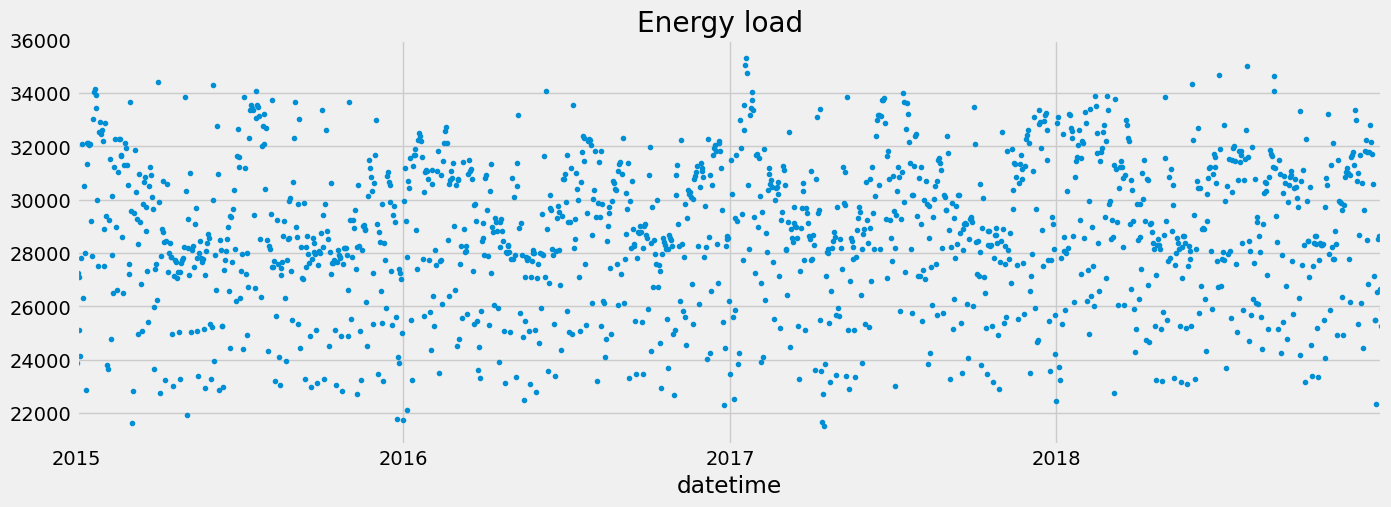

In [59]:
df_enrg['total_load_actual'].plot(style='.',
        figsize=(15,5),
        color=color_pal[0],
        title="Energy load  ")
plt.show

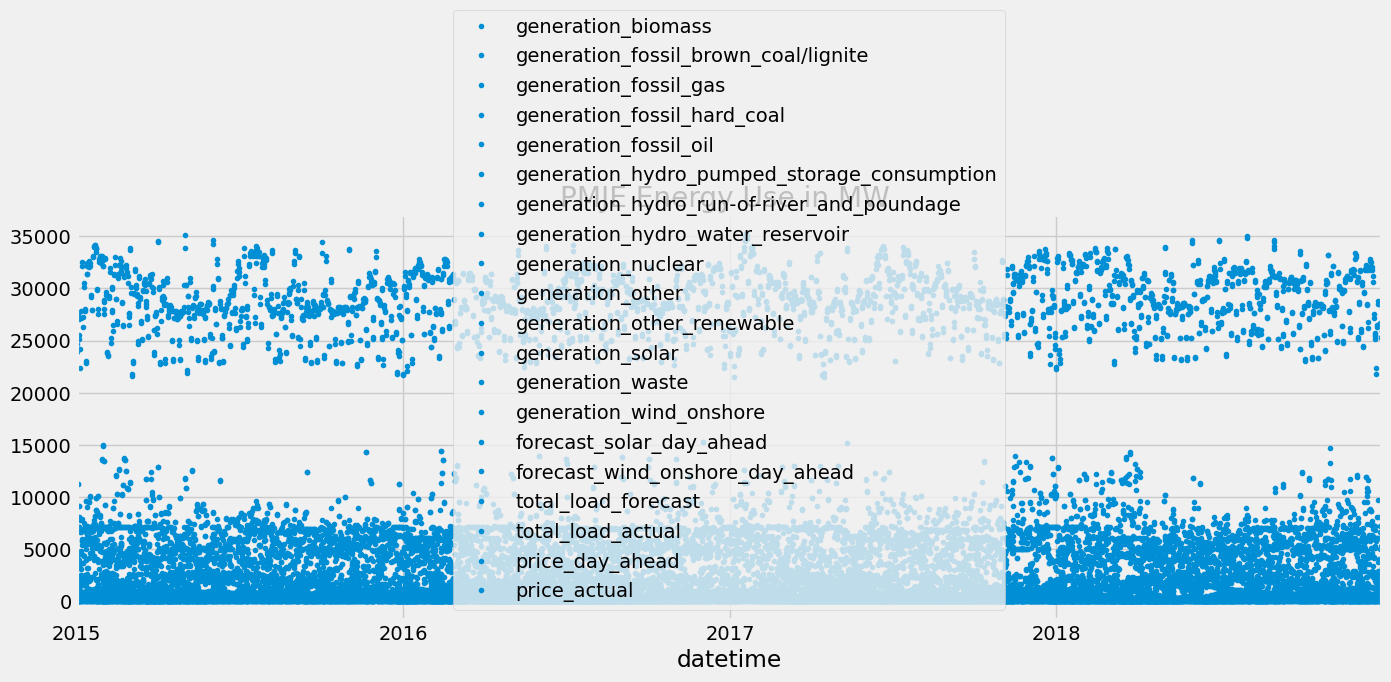

In [60]:
df_enrg.plot(style='.',
        figsize=(15,5),
        color=color_pal[0],
        title="PMJE Energy Use in MW ")
plt.show()

<AxesSubplot:ylabel='Frequency'>

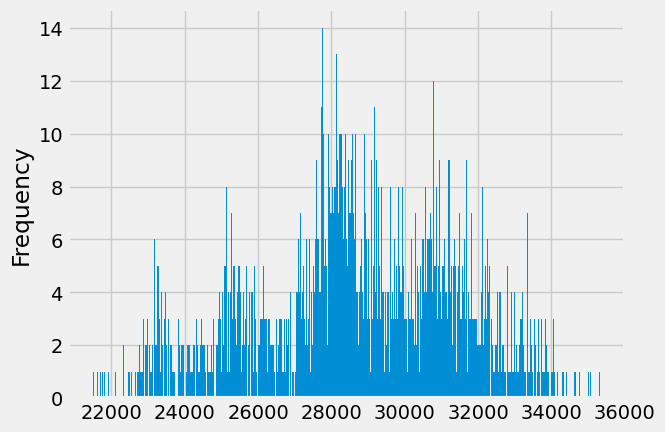

In [61]:
df_enrg['total_load_actual'].plot(kind='hist', bins=500)

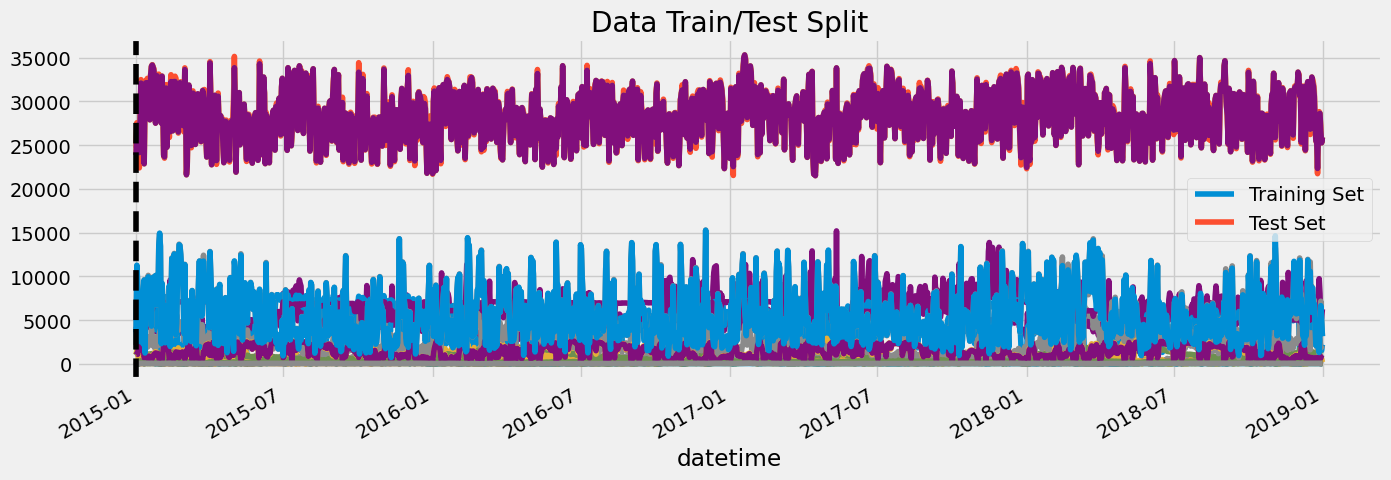

In [62]:
train = df_enrg.loc[df_enrg.index < '2015-01-01']
test = df_enrg.loc[df_enrg.index >= '2015-01-01']

fig, ax = plt.subplots(figsize=(15,5))

train[train.columns.tolist() + ['total_load_actual']].plot(ax=ax, label='Training Set', title="Data Train/Test Split")
test[test.columns.tolist() + ['total_load_actual']].plot(ax=ax, label='Test Set')
ax.axvline('2015-01-01', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [63]:
train.columns.to_list()[0]

'generation_biomass'

In [64]:
train

,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_hydro_pumped_storage_consumption,generation_hydro_run-of-river_and_poundage,generation_hydro_water_reservoir,generation_nuclear,generation_other,generation_other_renewable,generation_solar,generation_waste,generation_wind_onshore,forecast_solar_day_ahead,forecast_wind_onshore_day_ahead,total_load_forecast,total_load_actual,price_day_ahead,price_actual
datetime,,,,,,,,,,,,,,,,,,,,


In [65]:
len(train)

0

In [66]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2

In [68]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=5)

# 1. Time Series Cross Validation

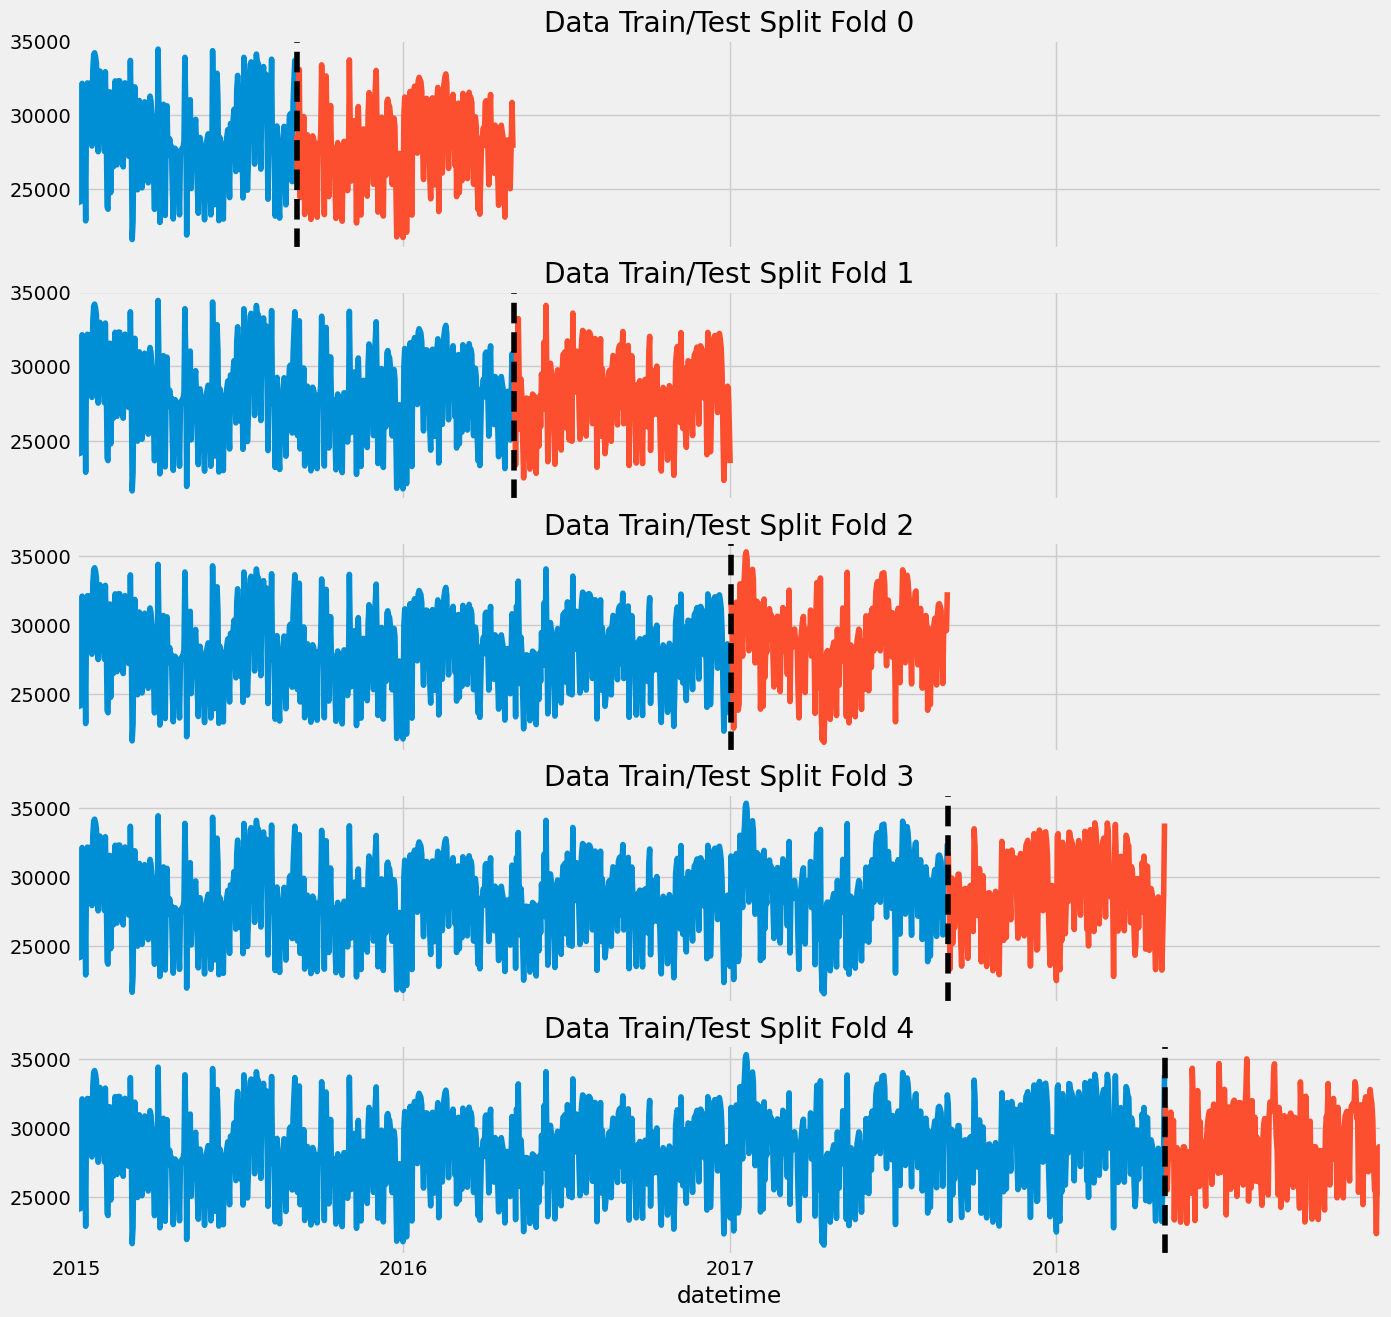

In [69]:
fig, axs = plt.subplots(5, 1 , figsize=(15, 15),
                      sharex=True)

fold=0
for train_idx, val_idx in tss.split(df_enrg):
    train = df_enrg.iloc[train_idx]
    test = df_enrg.iloc[val_idx]
    train['total_load_actual'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['total_load_actual'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(),color='black', ls='--')
    fold+=1
plt.show()

# 2.  Add Time Features

In [70]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    
    df = df.copy()
    
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df_enrg = create_features(df_enrg)

In [71]:
df_enrg

,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_hydro_pumped_storage_consumption,generation_hydro_run-of-river_and_poundage,generation_hydro_water_reservoir,generation_nuclear,generation_other,...,price_day_ahead,price_actual,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
datetime,,,,,,,,,,,,,,,,,,,,,
2015-01-01,428.500000,257.416667,4256.750000,4246.541667,160.208333,1070.416667,1047.875000,2166.875000,7097.000000,42.250000,...,46.702500,62.148750,0,3,1,1,2015,1,1,1
2015-01-02,385.291667,0.000000,3540.666667,1237.000000,198.625000,1543.666667,1293.541667,3714.958333,7105.833333,44.250000,...,16.530833,69.327083,0,4,1,1,2015,2,2,1
2015-01-03,440.500000,0.000000,3444.291667,1344.250000,226.583333,1338.458333,1374.750000,3969.416667,7095.375000,78.041667,...,25.799167,65.706667,0,5,1,1,2015,3,3,1
2015-01-04,397.125000,0.000000,3469.583333,2244.958333,355.416667,590.000000,1495.250000,3241.333333,7083.625000,83.708333,...,29.873333,58.264167,0,6,1,1,2015,4,4,1
2015-01-05,362.583333,166.375000,4709.958333,3174.916667,315.916667,842.625000,1089.833333,2431.416667,4700.375000,44.958333,...,38.810833,74.568750,0,0,1,1,2015,5,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,304.333333,698.375000,9744.125000,2899.083333,297.541667,139.750000,1187.833333,3798.458333,6065.916667,61.791667,...,67.634583,73.029583,0,3,4,12,2018,361,27,52
2018-12-28,316.458333,656.166667,8060.791667,2777.083333,274.000000,81.000000,1151.625000,2526.208333,6072.583333,59.875000,...,63.785417,69.457083,0,4,4,12,2018,362,28,52
2018-12-29,289.625000,4.708333,4981.833333,1733.833333,255.166667,602.250000,1120.375000,1823.875000,6072.375000,60.166667,...,57.048333,62.544583,0,5,4,12,2018,363,29,52


# 3. Lag Features

In [72]:
def add_lags(df):
    target_map = df['total_load_actual'].to_dict()
    df['lag1'] = (df.index - pd.Timedelta('364 days')).map(target_map)
    df['lag2'] = (df.index - pd.Timedelta('728 days')).map(target_map)
    df['lag3'] = (df.index - pd.Timedelta('1092 days ')).map(target_map)
    return df

In [73]:
df_enrg = add_lags(df_enrg)

In [74]:
df_enrg['total_load_actual']

datetime
2015-01-01    23896.750000
2015-01-02    27251.291667
2015-01-03    25110.666667
2015-01-04    27112.625000
2015-01-05    24144.833333
                  ...     
2018-12-27    28532.208333
2018-12-28    28637.750000
2018-12-29    26636.750000
2018-12-30    25263.916667
2018-12-31    25897.250000
Name: total_load_actual, Length: 1461, dtype: float64

In [75]:
df_enrg.tail()

,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_hydro_pumped_storage_consumption,generation_hydro_run-of-river_and_poundage,generation_hydro_water_reservoir,generation_nuclear,generation_other,...,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,lag1,lag2,lag3
datetime,,,,,,,,,,,,,,,,,,,,,
2018-12-27,304.333333,698.375000,9744.125000,2899.083333,297.541667,139.750000,1187.833333,3798.458333,6065.916667,61.791667,...,3,4,12,2018,361,27,52,29078.250000,28649.958333,25006.625000
2018-12-28,316.458333,656.166667,8060.791667,2777.083333,274.000000,81.000000,1151.625000,2526.208333,6072.583333,59.875000,...,4,4,12,2018,362,28,52,28171.458333,28549.458333,21755.208333
2018-12-29,289.625000,4.708333,4981.833333,1733.833333,255.166667,602.250000,1120.375000,1823.875000,6072.375000,60.166667,...,5,4,12,2018,363,29,52,25689.041667,26196.791667,29964.000000
2018-12-30,275.375000,0.000000,5269.541667,1525.291667,223.833333,620.708333,1066.458333,1937.875000,6071.333333,59.125000,...,6,4,12,2018,364,30,52,24203.541667,23483.291667,31188.500000
2018-12-31,295.916667,0.000000,6257.958333,2197.416667,199.666667,201.916667,1062.750000,2117.166667,6072.291667,57.875000,...,0,4,12,2018,365,31,1,22462.000000,31486.041667,29200.916667


In [76]:
df_enrg = df_enrg.sort_index()

In [77]:
df_enrg.columns.tolist()

['generation_biomass',
 'generation_fossil_brown_coal/lignite',
 'generation_fossil_gas',
 'generation_fossil_hard_coal',
 'generation_fossil_oil',
 'generation_hydro_pumped_storage_consumption',
 'generation_hydro_run-of-river_and_poundage',
 'generation_hydro_water_reservoir',
 'generation_nuclear',
 'generation_other',
 'generation_other_renewable',
 'generation_solar',
 'generation_waste',
 'generation_wind_onshore',
 'forecast_solar_day_ahead',
 'forecast_wind_onshore_day_ahead',
 'total_load_forecast',
 'total_load_actual',
 'price_day_ahead',
 'price_actual',
 'hour',
 'dayofweek',
 'quarter',
 'month',
 'year',
 'dayofyear',
 'dayofmonth',
 'weekofyear',
 'lag1',
 'lag2',
 'lag3']

# Train using Cross Validation

In [78]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
fold= 0
preds = []
scores = []

for train_idx, val_idx in tss.split(df_enrg):
    train = df_enrg.iloc[train_idx]
    test = df_enrg.iloc[val_idx]
    
    
    train = create_features(train)
    test = create_features(test)
    
    FEATURES = ['generation_biomass',
 'generation_fossil_brown_coal/lignite',
 'generation_fossil_gas',
 'generation_fossil_hard_coal',
 'generation_fossil_oil',
 'generation_hydro_pumped_storage_consumption',
 'generation_hydro_run-of-river_and_poundage',
 'generation_hydro_water_reservoir',
 'generation_nuclear',
 'generation_other',
 'generation_other_renewable',
 'generation_solar',
 'generation_waste',
 'generation_wind_onshore',
 'forecast_solar_day_ahead',
 'forecast_wind_onshore_day_ahead',
 'total_load_forecast',
 'price_day_ahead',
 'price_actual',
 'hour',
 'dayofweek',
 'quarter',
 'month',
 'year',
 'dayofyear',
 'dayofmonth',
 'weekofyear',
 'lag1',
 'lag2',
 'lag3']

    TARGET = 'total_load_actual'
    X_train = train[FEATURES]
    y_train = train[TARGET]

    X_test = test[FEATURES]
    y_test = test[TARGET]
    
    # Convert weekofyear column to float64 type
    X_train['weekofyear'] = X_train['weekofyear'].astype('float64')
    X_test['weekofyear'] = X_test['weekofyear'].astype('float64')
    
    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)

[10:20:54] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:28535.98428	validation_1-rmse:28032.43986
[100]	validation_0-rmse:10597.94786	validation_1-rmse:10249.94366
[200]	validation_0-rmse:3962.78162	validation_1-rmse:3784.28470
[300]	validation_0-rmse:1516.40996	validation_1-rmse:1442.44811
[400]	validation_0-rmse:631.30483	validation_1-rmse:653.96622
[500]	validation_0-rmse:334.40170	validation_1-rmse:430.81360
[600]	validation_0-rmse:244.07029	validation_1-rmse:390.03962
[700]	validation_0-rmse:209.29535	validation_1-rmse:385.11025
[722]	validation_0-rmse:203.75482	validation_1-rmse:386.16682
[10:20:57] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:28287.46120	validation_1-rmse:28244.96813
[100]	validation_0-rmse:10446.87403	validation_1-rmse:10376.86818
[200]	validation_0-rmse:3876.86298	validation_1-rmse:3851.18596


In [79]:
scores

[384.4474322117058,
 326.0053984727191,
 387.29670775162106,
 308.9547540993305,
 250.32823999164214]

In [80]:
print(f'Score across folds {np.mean(scores):0.4f}')
print(f'Fold scores:{scores}')

Score across folds 331.4065
Fold scores:[384.4474322117058, 326.0053984727191, 387.29670775162106, 308.9547540993305, 250.32823999164214]


In [81]:
df_enrg = create_features(df_enrg)
FEATURES = ['generation_biomass',
 'generation_fossil_brown_coal/lignite',
 'generation_fossil_gas',
 'generation_fossil_hard_coal',
 'generation_fossil_oil',
 'generation_hydro_pumped_storage_consumption',
 'generation_hydro_run-of-river_and_poundage',
 'generation_hydro_water_reservoir',
 'generation_nuclear',
 'generation_other',
 'generation_other_renewable',
 'generation_solar',
 'generation_waste',
 'generation_wind_onshore',
 'forecast_solar_day_ahead',
 'forecast_wind_onshore_day_ahead',
 'total_load_forecast',
 'price_day_ahead',
 'price_actual',
 'hour',
 'dayofweek',
 'quarter',
 'month',
 'year',
 'dayofyear',
 'dayofmonth',
 'weekofyear',
 'lag1',
 'lag2',
 'lag3']

TARGET = 'total_load_actual'

X_all = df_enrg[FEATURES]
y_all = df_enrg[TARGET]

# Convert weekofyear column to float64 type
X_all['weekofyear'] = X_all['weekofyear'].astype('float64')
    
reg = xgb.XGBRegressor(base_score=0.5,
                      booster='gbtree',
                      n_estimators=600,
                      objective = 'reg:linear',
                      max_depth=3,
                      learning_rate=0.01)
reg.fit(X_all, y_all,
        eval_set=[(X_all, y_all)],
        verbose=100)

[10:21:14] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:28541.39836
[100]	validation_0-rmse:10492.07437
[200]	validation_0-rmse:3868.80870
[300]	validation_0-rmse:1450.76295
[400]	validation_0-rmse:596.42307
[500]	validation_0-rmse:332.23895
[599]	validation_0-rmse:268.84246


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=600, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alpha=0, ...)

In [82]:
df_enrg.index.max()


Timestamp('2018-12-31 00:00:00')

In [83]:
#create future dataframe
#future = pd.date_range('2018-12-31','2019-12-01', freq='1h')
#future_df = pd.DataFrame(index=future)
#future_df['isFuture'] = True
#df_enrg['isFuture'] = False
#df_and_future = pd.concat([df_enrg,future_df])
#df_and_future = create_features(df_and_future)
#df_and_future = add_lags(df_and_future)

In [84]:
future = pd.date_range('2018-12-31','2019-12-01', freq='1h',tz='Europe/London')
future_df = pd.DataFrame(index=future)

df_enrg.index = df_enrg.index.tz_localize('europe/London')

future_df['isFuture'] = True
df_enrg['isFuture'] = False

In [85]:
df_and_future = pd.concat([df_enrg,future_df])

In [86]:
df_and_future.index.max()

Timestamp('2019-12-01 00:00:00+0000', tz='Europe/London')

In [87]:
df_and_future

,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_hydro_pumped_storage_consumption,generation_hydro_run-of-river_and_poundage,generation_hydro_water_reservoir,generation_nuclear,generation_other,...,quarter,month,year,dayofyear,dayofmonth,weekofyear,lag1,lag2,lag3,isFuture
2015-01-01 00:00:00+00:00,428.500000,257.416667,4256.750000,4246.541667,160.208333,1070.416667,1047.875000,2166.875000,7097.000000,42.250000,...,1.0,1.0,2015.0,1.0,1.0,1,NaN,NaN,NaN,False
2015-01-02 00:00:00+00:00,385.291667,0.000000,3540.666667,1237.000000,198.625000,1543.666667,1293.541667,3714.958333,7105.833333,44.250000,...,1.0,1.0,2015.0,2.0,2.0,1,NaN,NaN,NaN,False
2015-01-03 00:00:00+00:00,440.500000,0.000000,3444.291667,1344.250000,226.583333,1338.458333,1374.750000,3969.416667,7095.375000,78.041667,...,1.0,1.0,2015.0,3.0,3.0,1,NaN,NaN,NaN,False
2015-01-04 00:00:00+00:00,397.125000,0.000000,3469.583333,2244.958333,355.416667,590.000000,1495.250000,3241.333333,7083.625000,83.708333,...,1.0,1.0,2015.0,4.0,4.0,1,NaN,NaN,NaN,False
2015-01-05 00:00:00+00:00,362.583333,166.375000,4709.958333,3174.916667,315.916667,842.625000,1089.833333,2431.416667,4700.375000,44.958333,...,1.0,1.0,2015.0,5.0,5.0,2,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-30 20:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,True
2019-11-30 21:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,True
2019-11-30 22:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,True
2019-11-30 23:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,True


In [88]:
df_and_future = create_features(df_and_future)

In [89]:
df_and_future

,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_hydro_pumped_storage_consumption,generation_hydro_run-of-river_and_poundage,generation_hydro_water_reservoir,generation_nuclear,generation_other,...,quarter,month,year,dayofyear,dayofmonth,weekofyear,lag1,lag2,lag3,isFuture
2015-01-01 00:00:00+00:00,428.500000,257.416667,4256.750000,4246.541667,160.208333,1070.416667,1047.875000,2166.875000,7097.000000,42.250000,...,1,1,2015,1,1,1,NaN,NaN,NaN,False
2015-01-02 00:00:00+00:00,385.291667,0.000000,3540.666667,1237.000000,198.625000,1543.666667,1293.541667,3714.958333,7105.833333,44.250000,...,1,1,2015,2,2,1,NaN,NaN,NaN,False
2015-01-03 00:00:00+00:00,440.500000,0.000000,3444.291667,1344.250000,226.583333,1338.458333,1374.750000,3969.416667,7095.375000,78.041667,...,1,1,2015,3,3,1,NaN,NaN,NaN,False
2015-01-04 00:00:00+00:00,397.125000,0.000000,3469.583333,2244.958333,355.416667,590.000000,1495.250000,3241.333333,7083.625000,83.708333,...,1,1,2015,4,4,1,NaN,NaN,NaN,False
2015-01-05 00:00:00+00:00,362.583333,166.375000,4709.958333,3174.916667,315.916667,842.625000,1089.833333,2431.416667,4700.375000,44.958333,...,1,1,2015,5,5,2,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-30 20:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,11,2019,334,30,48,NaN,NaN,NaN,True
2019-11-30 21:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,11,2019,334,30,48,NaN,NaN,NaN,True
2019-11-30 22:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,11,2019,334,30,48,NaN,NaN,NaN,True
2019-11-30 23:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,11,2019,334,30,48,NaN,NaN,NaN,True


In [90]:
df_and_future = add_lags(df_and_future)

In [91]:
df_and_future

,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_hydro_pumped_storage_consumption,generation_hydro_run-of-river_and_poundage,generation_hydro_water_reservoir,generation_nuclear,generation_other,...,quarter,month,year,dayofyear,dayofmonth,weekofyear,lag1,lag2,lag3,isFuture
2015-01-01 00:00:00+00:00,428.500000,257.416667,4256.750000,4246.541667,160.208333,1070.416667,1047.875000,2166.875000,7097.000000,42.250000,...,1,1,2015,1,1,1,NaN,NaN,NaN,False
2015-01-02 00:00:00+00:00,385.291667,0.000000,3540.666667,1237.000000,198.625000,1543.666667,1293.541667,3714.958333,7105.833333,44.250000,...,1,1,2015,2,2,1,NaN,NaN,NaN,False
2015-01-03 00:00:00+00:00,440.500000,0.000000,3444.291667,1344.250000,226.583333,1338.458333,1374.750000,3969.416667,7095.375000,78.041667,...,1,1,2015,3,3,1,NaN,NaN,NaN,False
2015-01-04 00:00:00+00:00,397.125000,0.000000,3469.583333,2244.958333,355.416667,590.000000,1495.250000,3241.333333,7083.625000,83.708333,...,1,1,2015,4,4,1,NaN,NaN,NaN,False
2015-01-05 00:00:00+00:00,362.583333,166.375000,4709.958333,3174.916667,315.916667,842.625000,1089.833333,2431.416667,4700.375000,44.958333,...,1,1,2015,5,5,2,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-30 20:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,11,2019,334,30,48,NaN,NaN,NaN,True
2019-11-30 21:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,11,2019,334,30,48,NaN,NaN,NaN,True
2019-11-30 22:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,11,2019,334,30,48,NaN,NaN,NaN,True
2019-11-30 23:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,11,2019,334,30,48,NaN,NaN,NaN,True


In [92]:
future_w_features = df_and_future[df_and_future['isFuture']].copy()

In [93]:
future_w_features

,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_hydro_pumped_storage_consumption,generation_hydro_run-of-river_and_poundage,generation_hydro_water_reservoir,generation_nuclear,generation_other,...,quarter,month,year,dayofyear,dayofmonth,weekofyear,lag1,lag2,lag3,isFuture
2018-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,12,2018,365,31,1,22462.000000,31486.041667,29200.916667,True
2018-12-31 01:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,12,2018,365,31,1,NaN,NaN,NaN,True
2018-12-31 02:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,12,2018,365,31,1,NaN,NaN,NaN,True
2018-12-31 03:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,12,2018,365,31,1,NaN,NaN,NaN,True
2018-12-31 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,12,2018,365,31,1,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-30 20:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,11,2019,334,30,48,NaN,NaN,NaN,True
2019-11-30 21:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,11,2019,334,30,48,NaN,NaN,NaN,True
2019-11-30 22:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,11,2019,334,30,48,NaN,NaN,NaN,True
2019-11-30 23:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,11,2019,334,30,48,NaN,NaN,NaN,True


In [94]:
future_w_features['weekofyear'] = future_w_features['weekofyear'].astype('int64')

# Predict the future

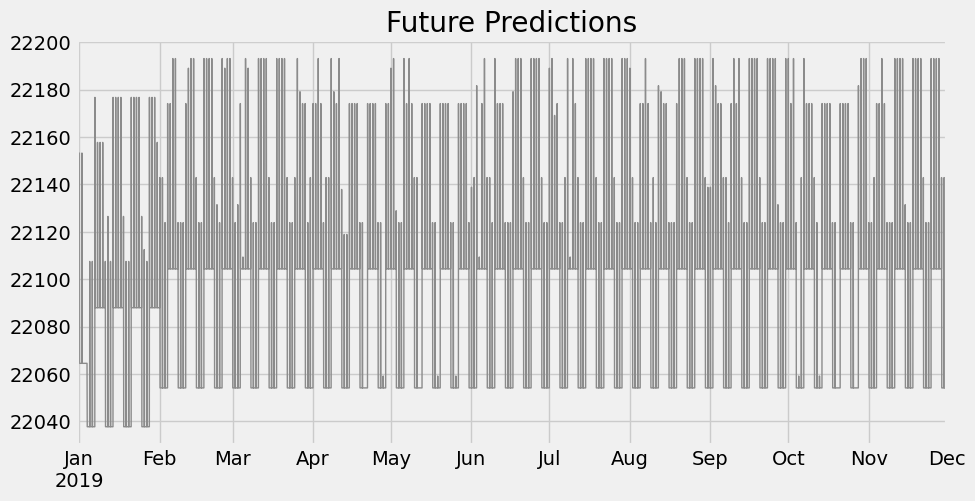

In [95]:
future_w_features['pred'] = reg.predict(future_w_features[FEATURES])
future_w_features['pred'].plot(figsize=(10, 5),
                               color=color_pal[4],
                               ms=1,
                               lw=1,
                               title='Future Predictions')
plt.show()

# Saving model for later

In [96]:
reg.save_model('model.json')

In [97]:
!ls -lh

total 2.2M
---------- 1 root root 1.6M Apr  1 10:21 __notebook__.ipynb
-rw-r--r-- 1 root root 576K Apr  1 10:21 model.json


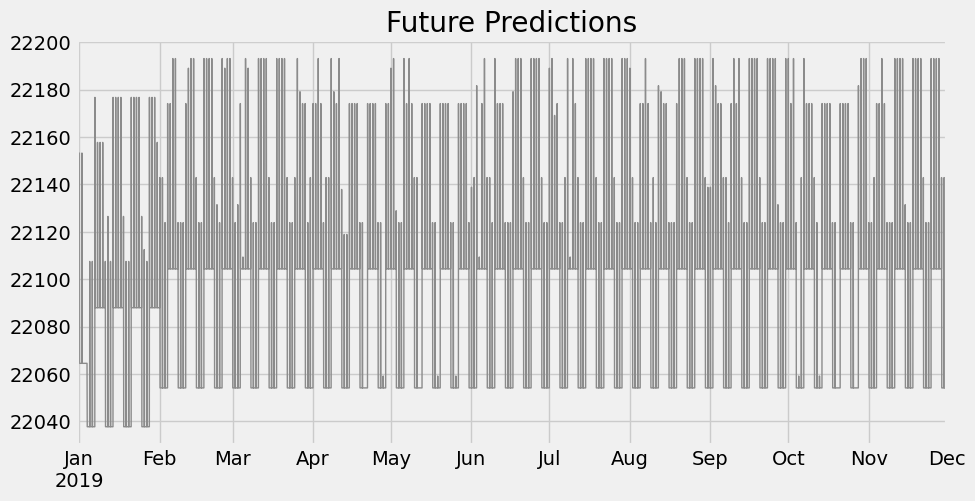

In [98]:
reg_new = xgb.XGBRegressor()
reg_new.load_model('model.json')
future_w_features['pred'] = reg_new.predict(future_w_features[FEATURES])
future_w_features['pred'].plot(figsize=(10, 5),
                               color=color_pal[4],
                               ms=1,
                               lw=1,
                               title='Future Predictions')
plt.show()

* # RandomizedSearchCV

In [100]:
from sklearn.model_selection import RandomizedSearchCV
# Define the parameter distribution to search over
param_dist = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [50, 100, 200,400,500,600,700]
}

# Initialize an XGBRegressor model
xgb_model = xgb.XGBRegressor()

# Initialize a RandomizedSearchCV object with 5-fold cross-validation
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=10, cv=5)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_all, y_all)

# Print the best parameters and the corresponding mean cross-validated score
print("Best parameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Best parameters:  {'n_estimators': 700, 'max_depth': 3, 'learning_rate': 0.01}
Best score:  0.9859964719697032


In [101]:
import matplotlib.pylab as plt
import seaborn as sns 
plt.style.use('ggplot')
pd.set_option('max_columns', 200)

In [102]:
df2

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178391,2018-12-31 19:00:00+01:00,Seville,287.760,287.150,288.150,1028,54,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178392,2018-12-31 20:00:00+01:00,Seville,285.760,285.150,286.150,1029,62,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178393,2018-12-31 21:00:00+01:00,Seville,285.150,285.150,285.150,1028,58,4,50,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178394,2018-12-31 22:00:00+01:00,Seville,284.150,284.150,284.150,1029,57,4,60,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [103]:
df2.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['dt_iso', 'city_name', 'temp', 'temp_min', 'temp_max', 'pressure',
       'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon'],
      dtype='object')>

In [104]:
df2.dtypes

dt_iso                  object
city_name               object
temp                   float64
temp_min               float64
temp_max               float64
pressure                 int64
humidity                 int64
wind_speed               int64
wind_deg                 int64
rain_1h                float64
rain_3h                float64
snow_3h                float64
clouds_all               int64
weather_id               int64
weather_main            object
weather_description     object
weather_icon            object
dtype: object

In [105]:
df2.describe()

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
count,178396.000000,178396.000000,178396.000000,1.783960e+05,178396.000000,178396.00000,178396.000000,178396.000000,178396.000000,178396.000000,178396.000000,178396.000000
mean,289.618605,288.330442,291.091267,1.069261e+03,68.423457,2.47056,166.591190,0.075492,0.000380,0.004763,25.073292,759.831902
std,8.026199,7.955491,8.612454,5.969632e+03,21.902888,2.09591,116.611927,0.398847,0.007288,0.222604,30.774129,108.733223
min,262.240000,262.240000,262.240000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000
25%,283.670000,282.483602,284.650000,1.013000e+03,53.000000,1.00000,55.000000,0.000000,0.000000,0.000000,0.000000,800.000000
50%,289.150000,288.150000,290.150000,1.018000e+03,72.000000,2.00000,177.000000,0.000000,0.000000,0.000000,20.000000,800.000000
75%,295.150000,293.730125,297.150000,1.022000e+03,87.000000,4.00000,270.000000,0.000000,0.000000,0.000000,40.000000,801.000000
max,315.600000,315.150000,321.150000,1.008371e+06,100.000000,133.00000,360.000000,12.000000,2.315000,21.500000,100.000000,804.000000


In [106]:
df2.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [107]:
weather = df2.copy()

In [108]:
weather = weather[['dt_iso',
         #'city_name', 
         'temp', 'temp_min', 'temp_max', 'pressure',
       'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h',
       'clouds_all', 
         # 'weather_id', 'weather_main', 'weather_description', 'weather_icon'
        ]].copy()

In [109]:
weather

,dt_iso,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all
0,2015-01-01 00:00:00+01:00,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0
1,2015-01-01 01:00:00+01:00,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0
2,2015-01-01 02:00:00+01:00,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0
3,2015-01-01 03:00:00+01:00,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0
4,2015-01-01 04:00:00+01:00,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
178391,2018-12-31 19:00:00+01:00,287.760,287.150,288.150,1028,54,3,30,0.0,0.0,0.0,0
178392,2018-12-31 20:00:00+01:00,285.760,285.150,286.150,1029,62,3,30,0.0,0.0,0.0,0
178393,2018-12-31 21:00:00+01:00,285.150,285.150,285.150,1028,58,4,50,0.0,0.0,0.0,0
178394,2018-12-31 22:00:00+01:00,284.150,284.150,284.150,1029,57,4,60,0.0,0.0,0.0,0


In [110]:
weather['dt_iso'] = pd.to_datetime(weather['dt_iso'])


In [111]:
weather

,dt_iso,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all
0,2015-01-01 00:00:00+01:00,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0
1,2015-01-01 01:00:00+01:00,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0
2,2015-01-01 02:00:00+01:00,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0
3,2015-01-01 03:00:00+01:00,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0
4,2015-01-01 04:00:00+01:00,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
178391,2018-12-31 19:00:00+01:00,287.760,287.150,288.150,1028,54,3,30,0.0,0.0,0.0,0
178392,2018-12-31 20:00:00+01:00,285.760,285.150,286.150,1029,62,3,30,0.0,0.0,0.0,0
178393,2018-12-31 21:00:00+01:00,285.150,285.150,285.150,1028,58,4,50,0.0,0.0,0.0,0
178394,2018-12-31 22:00:00+01:00,284.150,284.150,284.150,1029,57,4,60,0.0,0.0,0.0,0


In [112]:
df1['time'] = pd.to_datetime(df1['time'])

In [113]:
df1

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 19:00:00+01:00,297.0,0.0,7634.0,2628.0,178.0,1.0,1135.0,4836.0,6073.0,63.0,95.0,85.0,277.0,3113.0,96.0,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,7241.0,2566.0,174.0,1.0,1172.0,3931.0,6074.0,62.0,95.0,33.0,280.0,3288.0,51.0,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,7025.0,2422.0,168.0,50.0,1148.0,2831.0,6076.0,61.0,94.0,31.0,286.0,3503.0,36.0,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,6562.0,2293.0,163.0,108.0,1128.0,2068.0,6075.0,61.0,93.0,31.0,287.0,3586.0,29.0,3273.0,25450.0,25801.0,63.93,69.89


In [114]:
weather_prod = pd.merge(df1[['time','generation solar']],weather,left_on = 'time',right_on = 'dt_iso')

In [115]:
weather_prod

,time,generation solar,dt_iso,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all
0,2015-01-01 00:00:00+01:00,49.0,2015-01-01 00:00:00+01:00,270.475000,270.475000,270.475000,1001,77,1,62,0.0,0.0,0.0,0
1,2015-01-01 00:00:00+01:00,49.0,2015-01-01 00:00:00+01:00,267.325000,267.325000,267.325000,971,63,1,309,0.0,0.0,0.0,0
2,2015-01-01 00:00:00+01:00,49.0,2015-01-01 00:00:00+01:00,269.657312,269.657312,269.657312,1036,97,0,226,0.0,0.0,0.0,0
3,2015-01-01 00:00:00+01:00,49.0,2015-01-01 00:00:00+01:00,281.625000,281.625000,281.625000,1035,100,7,58,0.0,0.0,0.0,0
4,2015-01-01 00:00:00+01:00,49.0,2015-01-01 00:00:00+01:00,273.375000,273.375000,273.375000,1039,75,1,21,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178391,2018-12-31 23:00:00+01:00,31.0,2018-12-31 23:00:00+01:00,279.140000,278.150000,280.150000,1029,75,2,300,0.0,0.0,0.0,0
178392,2018-12-31 23:00:00+01:00,31.0,2018-12-31 23:00:00+01:00,275.150000,275.150000,275.150000,1031,74,1,360,0.0,0.0,0.0,0
178393,2018-12-31 23:00:00+01:00,31.0,2018-12-31 23:00:00+01:00,275.600000,275.150000,276.150000,1034,93,2,100,0.0,0.0,0.0,0
178394,2018-12-31 23:00:00+01:00,31.0,2018-12-31 23:00:00+01:00,280.130000,277.150000,283.150000,1028,100,5,310,0.0,0.0,0.0,0


In [116]:
weather_prod.isnull().sum()

time                 0
generation solar    90
dt_iso               0
temp                 0
temp_min             0
temp_max             0
pressure             0
humidity             0
wind_speed           0
wind_deg             0
rain_1h              0
rain_3h              0
snow_3h              0
clouds_all           0
dtype: int64

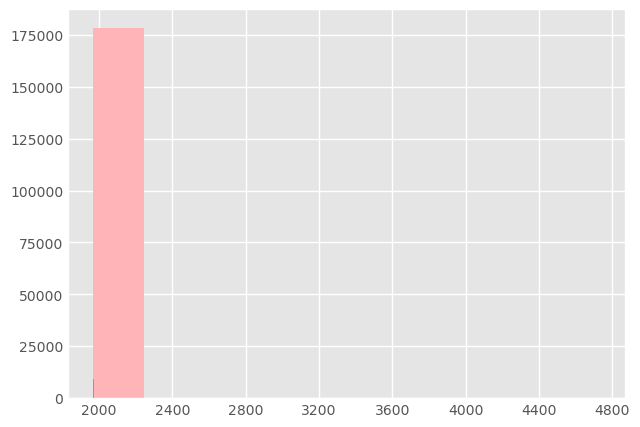

In [117]:
col = weather_prod.columns.to_list()
for i in col:
    plt.hist(weather_prod[i])

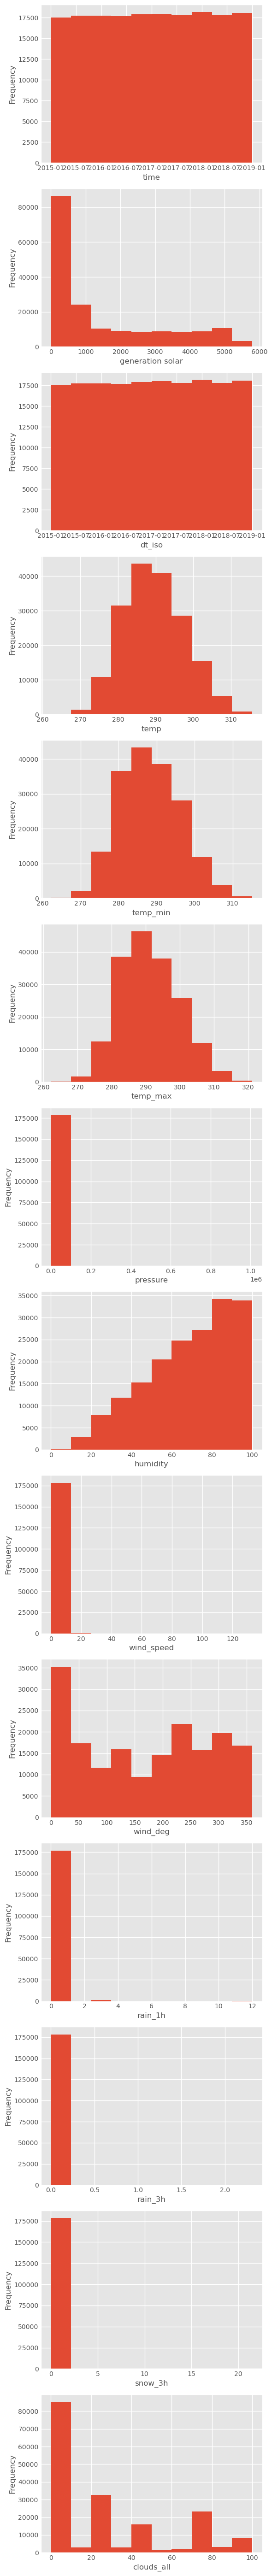

In [118]:
import matplotlib.pyplot as plt

# get list of column names
col = weather_prod.columns.to_list()

# create subplots for each column
fig, axs = plt.subplots(nrows=len(col), figsize=(6, 4*len(col)))

# plot a histogram for each column
for i, col_name in enumerate(col):
    axs[i].hist(weather_prod[col_name])
    axs[i].set_xlabel(col_name)
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [119]:
weather_prod.shape[1]

14

In [120]:
#plt.hist(weather_prod.iloc[2])

(array([   69.,  1394., 10824., 31452., 43599., 40904., 28484., 15476.,
         5395.,   799.]),
 array([262.24 , 267.576, 272.912, 278.248, 283.584, 288.92 , 294.256,
        299.592, 304.928, 310.264, 315.6  ]),
 <BarContainer object of 10 artists>)

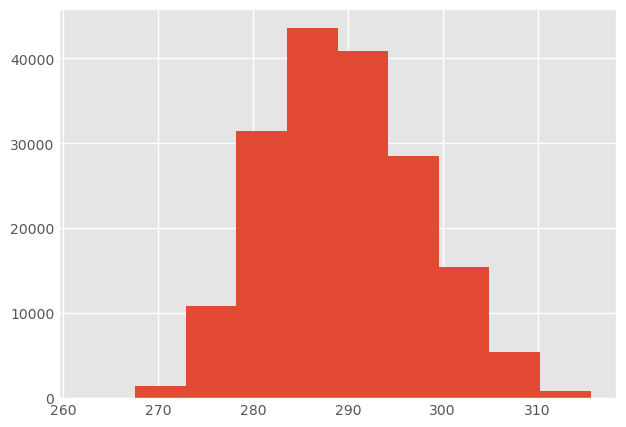

In [121]:
plt.hist(weather_prod['temp'])

In [122]:
import numpy as np

mean = np.mean(weather_prod['temp'])
std_dev = np.std(weather_prod['temp'])

In [123]:
mean

289.6186050165432

In [124]:
std_dev

8.02617678052377

In [125]:
threshold = 3 * std_dev

In [126]:
outliers = [value for value in weather_prod['temp'] if abs(value - mean) > threshold]
outliers

[265.442,
 265.442,
 265.442,
 265.261,
 265.261,
 265.261,
 264.428,
 264.428,
 265.091,
 265.091,
 264.132,
 262.24,
 313.85,
 314.33,
 314.3,
 314.08,
 314.08,
 314.26,
 314.25,
 313.8,
 313.7,
 313.92,
 313.71,
 313.8,
 314.33,
 314.24,
 313.87,
 313.96,
 314.51,
 314.76,
 315.03,
 314.29,
 313.93,
 314.76,
 314.15,
 314.54,
 313.94,
 313.76,
 313.76,
 314.76,
 314.63,
 315.15,
 315.15,
 313.76,
 314.15,
 314.15,
 314.15,
 314.54,
 314.76,
 313.76,
 313.7,
 314.7,
 314.76,
 315.15,
 313.76,
 313.76,
 313.7,
 314.15,
 314.76,
 314.15,
 314.15,
 314.15,
 314.54,
 315.6,
 315.54,
 315.15,
 313.76]

In [127]:
import numpy as np
import pandas as pd

# Assuming we have a DataFrame named 'df' and a column named 'feature'
mean = np.mean(weather_prod['temp'])
std_dev = np.std(weather_prod['temp'])
threshold = 3 * std_dev
outliers = weather_prod[(weather_prod['temp'] - mean).abs() > threshold].index
weather_prod.drop(outliers, inplace=True)

In [128]:
weather_prod

,time,generation solar,dt_iso,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all
0,2015-01-01 00:00:00+01:00,49.0,2015-01-01 00:00:00+01:00,270.475000,270.475000,270.475000,1001,77,1,62,0.0,0.0,0.0,0
1,2015-01-01 00:00:00+01:00,49.0,2015-01-01 00:00:00+01:00,267.325000,267.325000,267.325000,971,63,1,309,0.0,0.0,0.0,0
2,2015-01-01 00:00:00+01:00,49.0,2015-01-01 00:00:00+01:00,269.657312,269.657312,269.657312,1036,97,0,226,0.0,0.0,0.0,0
3,2015-01-01 00:00:00+01:00,49.0,2015-01-01 00:00:00+01:00,281.625000,281.625000,281.625000,1035,100,7,58,0.0,0.0,0.0,0
4,2015-01-01 00:00:00+01:00,49.0,2015-01-01 00:00:00+01:00,273.375000,273.375000,273.375000,1039,75,1,21,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178391,2018-12-31 23:00:00+01:00,31.0,2018-12-31 23:00:00+01:00,279.140000,278.150000,280.150000,1029,75,2,300,0.0,0.0,0.0,0
178392,2018-12-31 23:00:00+01:00,31.0,2018-12-31 23:00:00+01:00,275.150000,275.150000,275.150000,1031,74,1,360,0.0,0.0,0.0,0
178393,2018-12-31 23:00:00+01:00,31.0,2018-12-31 23:00:00+01:00,275.600000,275.150000,276.150000,1034,93,2,100,0.0,0.0,0.0,0
178394,2018-12-31 23:00:00+01:00,31.0,2018-12-31 23:00:00+01:00,280.130000,277.150000,283.150000,1028,100,5,310,0.0,0.0,0.0,0


In [129]:
mean = np.mean(weather_prod['temp_min'])
std_dev = np.std(weather_prod['temp_min'])
threshold = 3 * std_dev
outliers = weather_prod[(weather_prod['temp_min'] - mean).abs() > threshold].index
weather_prod.drop(outliers,inplace=True)

In [130]:
weather_prod

,time,generation solar,dt_iso,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all
0,2015-01-01 00:00:00+01:00,49.0,2015-01-01 00:00:00+01:00,270.475000,270.475000,270.475000,1001,77,1,62,0.0,0.0,0.0,0
1,2015-01-01 00:00:00+01:00,49.0,2015-01-01 00:00:00+01:00,267.325000,267.325000,267.325000,971,63,1,309,0.0,0.0,0.0,0
2,2015-01-01 00:00:00+01:00,49.0,2015-01-01 00:00:00+01:00,269.657312,269.657312,269.657312,1036,97,0,226,0.0,0.0,0.0,0
3,2015-01-01 00:00:00+01:00,49.0,2015-01-01 00:00:00+01:00,281.625000,281.625000,281.625000,1035,100,7,58,0.0,0.0,0.0,0
4,2015-01-01 00:00:00+01:00,49.0,2015-01-01 00:00:00+01:00,273.375000,273.375000,273.375000,1039,75,1,21,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178391,2018-12-31 23:00:00+01:00,31.0,2018-12-31 23:00:00+01:00,279.140000,278.150000,280.150000,1029,75,2,300,0.0,0.0,0.0,0
178392,2018-12-31 23:00:00+01:00,31.0,2018-12-31 23:00:00+01:00,275.150000,275.150000,275.150000,1031,74,1,360,0.0,0.0,0.0,0
178393,2018-12-31 23:00:00+01:00,31.0,2018-12-31 23:00:00+01:00,275.600000,275.150000,276.150000,1034,93,2,100,0.0,0.0,0.0,0
178394,2018-12-31 23:00:00+01:00,31.0,2018-12-31 23:00:00+01:00,280.130000,277.150000,283.150000,1028,100,5,310,0.0,0.0,0.0,0


In [131]:
mean = np.mean(weather_prod['temp_max'])
std_dev = np.std(weather_prod['temp_max'])
threshold = 3 * std_dev
outliers = weather_prod[(weather_prod['temp_max'] - mean).abs() > threshold].index

In [132]:
outliers

Int64Index([18417, 21802, 21917, 22038, 22043, 22048, 22158, 22163, 22168,
            22173,
            ...
            73936, 73941, 73949, 74051, 74211, 74309, 74316, 74424, 74429,
            74434],
           dtype='int64', length=210)

In [133]:
weather_prod.drop(outliers,inplace=True)

In [134]:
weather_prod

,time,generation solar,dt_iso,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all
0,2015-01-01 00:00:00+01:00,49.0,2015-01-01 00:00:00+01:00,270.475000,270.475000,270.475000,1001,77,1,62,0.0,0.0,0.0,0
1,2015-01-01 00:00:00+01:00,49.0,2015-01-01 00:00:00+01:00,267.325000,267.325000,267.325000,971,63,1,309,0.0,0.0,0.0,0
2,2015-01-01 00:00:00+01:00,49.0,2015-01-01 00:00:00+01:00,269.657312,269.657312,269.657312,1036,97,0,226,0.0,0.0,0.0,0
3,2015-01-01 00:00:00+01:00,49.0,2015-01-01 00:00:00+01:00,281.625000,281.625000,281.625000,1035,100,7,58,0.0,0.0,0.0,0
4,2015-01-01 00:00:00+01:00,49.0,2015-01-01 00:00:00+01:00,273.375000,273.375000,273.375000,1039,75,1,21,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178391,2018-12-31 23:00:00+01:00,31.0,2018-12-31 23:00:00+01:00,279.140000,278.150000,280.150000,1029,75,2,300,0.0,0.0,0.0,0
178392,2018-12-31 23:00:00+01:00,31.0,2018-12-31 23:00:00+01:00,275.150000,275.150000,275.150000,1031,74,1,360,0.0,0.0,0.0,0
178393,2018-12-31 23:00:00+01:00,31.0,2018-12-31 23:00:00+01:00,275.600000,275.150000,276.150000,1034,93,2,100,0.0,0.0,0.0,0
178394,2018-12-31 23:00:00+01:00,31.0,2018-12-31 23:00:00+01:00,280.130000,277.150000,283.150000,1028,100,5,310,0.0,0.0,0.0,0


In [135]:
mean = np.mean(weather_prod['temp_min'])
std_dev = np.std(weather_prod['temp_min'])
threshold = 3 * std_dev
outliers = weather_prod[(weather_prod['temp_min'] - mean).abs() > threshold].index
weather_prod.drop(outliers,inplace=True)

In [136]:
weather_prod

,time,generation solar,dt_iso,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all
0,2015-01-01 00:00:00+01:00,49.0,2015-01-01 00:00:00+01:00,270.475000,270.475000,270.475000,1001,77,1,62,0.0,0.0,0.0,0
1,2015-01-01 00:00:00+01:00,49.0,2015-01-01 00:00:00+01:00,267.325000,267.325000,267.325000,971,63,1,309,0.0,0.0,0.0,0
2,2015-01-01 00:00:00+01:00,49.0,2015-01-01 00:00:00+01:00,269.657312,269.657312,269.657312,1036,97,0,226,0.0,0.0,0.0,0
3,2015-01-01 00:00:00+01:00,49.0,2015-01-01 00:00:00+01:00,281.625000,281.625000,281.625000,1035,100,7,58,0.0,0.0,0.0,0
4,2015-01-01 00:00:00+01:00,49.0,2015-01-01 00:00:00+01:00,273.375000,273.375000,273.375000,1039,75,1,21,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178391,2018-12-31 23:00:00+01:00,31.0,2018-12-31 23:00:00+01:00,279.140000,278.150000,280.150000,1029,75,2,300,0.0,0.0,0.0,0
178392,2018-12-31 23:00:00+01:00,31.0,2018-12-31 23:00:00+01:00,275.150000,275.150000,275.150000,1031,74,1,360,0.0,0.0,0.0,0
178393,2018-12-31 23:00:00+01:00,31.0,2018-12-31 23:00:00+01:00,275.600000,275.150000,276.150000,1034,93,2,100,0.0,0.0,0.0,0
178394,2018-12-31 23:00:00+01:00,31.0,2018-12-31 23:00:00+01:00,280.130000,277.150000,283.150000,1028,100,5,310,0.0,0.0,0.0,0


In [137]:
weather_prod = weather_prod.drop('dt_iso',axis=1)

In [138]:
weather_prod

,time,generation solar,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all
0,2015-01-01 00:00:00+01:00,49.0,270.475000,270.475000,270.475000,1001,77,1,62,0.0,0.0,0.0,0
1,2015-01-01 00:00:00+01:00,49.0,267.325000,267.325000,267.325000,971,63,1,309,0.0,0.0,0.0,0
2,2015-01-01 00:00:00+01:00,49.0,269.657312,269.657312,269.657312,1036,97,0,226,0.0,0.0,0.0,0
3,2015-01-01 00:00:00+01:00,49.0,281.625000,281.625000,281.625000,1035,100,7,58,0.0,0.0,0.0,0
4,2015-01-01 00:00:00+01:00,49.0,273.375000,273.375000,273.375000,1039,75,1,21,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178391,2018-12-31 23:00:00+01:00,31.0,279.140000,278.150000,280.150000,1029,75,2,300,0.0,0.0,0.0,0
178392,2018-12-31 23:00:00+01:00,31.0,275.150000,275.150000,275.150000,1031,74,1,360,0.0,0.0,0.0,0
178393,2018-12-31 23:00:00+01:00,31.0,275.600000,275.150000,276.150000,1034,93,2,100,0.0,0.0,0.0,0
178394,2018-12-31 23:00:00+01:00,31.0,280.130000,277.150000,283.150000,1028,100,5,310,0.0,0.0,0.0,0


In [139]:
weather_prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178039 entries, 0 to 178395
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   time              178039 non-null  object 
 1   generation solar  177949 non-null  float64
 2   temp              178039 non-null  float64
 3   temp_min          178039 non-null  float64
 4   temp_max          178039 non-null  float64
 5   pressure          178039 non-null  int64  
 6   humidity          178039 non-null  int64  
 7   wind_speed        178039 non-null  int64  
 8   wind_deg          178039 non-null  int64  
 9   rain_1h           178039 non-null  float64
 10  rain_3h           178039 non-null  float64
 11  snow_3h           178039 non-null  float64
 12  clouds_all        178039 non-null  int64  
dtypes: float64(7), int64(5), object(1)
memory usage: 19.0+ MB


In [140]:
weather_prod.isnull().sum()

time                 0
generation solar    90
temp                 0
temp_min             0
temp_max             0
pressure             0
humidity             0
wind_speed           0
wind_deg             0
rain_1h              0
rain_3h              0
snow_3h              0
clouds_all           0
dtype: int64

In [141]:
weather_prod = weather_prod.drop(columns = ['rain_3h','snow_3h','wind_speed','rain_1h'],axis=1)

In [142]:
weather_prod

,time,generation solar,temp,temp_min,temp_max,pressure,humidity,wind_deg,clouds_all
0,2015-01-01 00:00:00+01:00,49.0,270.475000,270.475000,270.475000,1001,77,62,0
1,2015-01-01 00:00:00+01:00,49.0,267.325000,267.325000,267.325000,971,63,309,0
2,2015-01-01 00:00:00+01:00,49.0,269.657312,269.657312,269.657312,1036,97,226,0
3,2015-01-01 00:00:00+01:00,49.0,281.625000,281.625000,281.625000,1035,100,58,0
4,2015-01-01 00:00:00+01:00,49.0,273.375000,273.375000,273.375000,1039,75,21,0
...,...,...,...,...,...,...,...,...,...
178391,2018-12-31 23:00:00+01:00,31.0,279.140000,278.150000,280.150000,1029,75,300,0
178392,2018-12-31 23:00:00+01:00,31.0,275.150000,275.150000,275.150000,1031,74,360,0
178393,2018-12-31 23:00:00+01:00,31.0,275.600000,275.150000,276.150000,1034,93,100,0
178394,2018-12-31 23:00:00+01:00,31.0,280.130000,277.150000,283.150000,1028,100,310,0


In [143]:
weather_prod = weather_prod.set_index('time')

In [144]:
weather_prod

,generation solar,temp,temp_min,temp_max,pressure,humidity,wind_deg,clouds_all
time,,,,,,,,
2015-01-01 00:00:00+01:00,49.0,270.475000,270.475000,270.475000,1001,77,62,0
2015-01-01 00:00:00+01:00,49.0,267.325000,267.325000,267.325000,971,63,309,0
2015-01-01 00:00:00+01:00,49.0,269.657312,269.657312,269.657312,1036,97,226,0
2015-01-01 00:00:00+01:00,49.0,281.625000,281.625000,281.625000,1035,100,58,0
2015-01-01 00:00:00+01:00,49.0,273.375000,273.375000,273.375000,1039,75,21,0
...,...,...,...,...,...,...,...,...
2018-12-31 23:00:00+01:00,31.0,279.140000,278.150000,280.150000,1029,75,300,0
2018-12-31 23:00:00+01:00,31.0,275.150000,275.150000,275.150000,1031,74,360,0
2018-12-31 23:00:00+01:00,31.0,275.600000,275.150000,276.150000,1034,93,100,0


In [146]:
# fill NaN values with the median value of the column 'column_name'
median_value = weather_prod['generation solar'].median()
weather_prod['generation solar'].fillna(median_value, inplace=True)

In [147]:
weather_prod.isnull().sum()

generation solar    0
temp                0
temp_min            0
temp_max            0
pressure            0
humidity            0
wind_deg            0
clouds_all          0
dtype: int64

In [148]:
y_weather_prod = weather_prod['generation solar']
x_weather_prod = weather_prod.drop('generation solar',axis=1)

In [149]:
from sklearn.model_selection import cross_val_score,train_test_split

In [150]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [151]:
weather_prod = weather_prod.drop(columns=['clouds_all','humidity'],axis=1)

In [152]:
weather_prod = weather_prod.drop('pressure',axis=1)

In [153]:
weather_prod

,generation solar,temp,temp_min,temp_max,wind_deg
time,,,,,
2015-01-01 00:00:00+01:00,49.0,270.475000,270.475000,270.475000,62
2015-01-01 00:00:00+01:00,49.0,267.325000,267.325000,267.325000,309
2015-01-01 00:00:00+01:00,49.0,269.657312,269.657312,269.657312,226
2015-01-01 00:00:00+01:00,49.0,281.625000,281.625000,281.625000,58
2015-01-01 00:00:00+01:00,49.0,273.375000,273.375000,273.375000,21
...,...,...,...,...,...
2018-12-31 23:00:00+01:00,31.0,279.140000,278.150000,280.150000,300
2018-12-31 23:00:00+01:00,31.0,275.150000,275.150000,275.150000,360
2018-12-31 23:00:00+01:00,31.0,275.600000,275.150000,276.150000,100


In [154]:
weather_prod

,generation solar,temp,temp_min,temp_max,wind_deg
time,,,,,
2015-01-01 00:00:00+01:00,49.0,270.475000,270.475000,270.475000,62
2015-01-01 00:00:00+01:00,49.0,267.325000,267.325000,267.325000,309
2015-01-01 00:00:00+01:00,49.0,269.657312,269.657312,269.657312,226
2015-01-01 00:00:00+01:00,49.0,281.625000,281.625000,281.625000,58
2015-01-01 00:00:00+01:00,49.0,273.375000,273.375000,273.375000,21
...,...,...,...,...,...
2018-12-31 23:00:00+01:00,31.0,279.140000,278.150000,280.150000,300
2018-12-31 23:00:00+01:00,31.0,275.150000,275.150000,275.150000,360
2018-12-31 23:00:00+01:00,31.0,275.600000,275.150000,276.150000,100


In [155]:
y_weather_prod = weather_prod['generation solar']
x_weather_prod = weather_prod.drop('generation solar',axis=1)

In [156]:
y_weather_prod

time
2015-01-01 00:00:00+01:00    49.0
2015-01-01 00:00:00+01:00    49.0
2015-01-01 00:00:00+01:00    49.0
2015-01-01 00:00:00+01:00    49.0
2015-01-01 00:00:00+01:00    49.0
                             ... 
2018-12-31 23:00:00+01:00    31.0
2018-12-31 23:00:00+01:00    31.0
2018-12-31 23:00:00+01:00    31.0
2018-12-31 23:00:00+01:00    31.0
2018-12-31 23:00:00+01:00    31.0
Name: generation solar, Length: 178039, dtype: float64

In [157]:
x_weather_prod

,temp,temp_min,temp_max,wind_deg
time,,,,
2015-01-01 00:00:00+01:00,270.475000,270.475000,270.475000,62
2015-01-01 00:00:00+01:00,267.325000,267.325000,267.325000,309
2015-01-01 00:00:00+01:00,269.657312,269.657312,269.657312,226
2015-01-01 00:00:00+01:00,281.625000,281.625000,281.625000,58
2015-01-01 00:00:00+01:00,273.375000,273.375000,273.375000,21
...,...,...,...,...
2018-12-31 23:00:00+01:00,279.140000,278.150000,280.150000,300
2018-12-31 23:00:00+01:00,275.150000,275.150000,275.150000,360
2018-12-31 23:00:00+01:00,275.600000,275.150000,276.150000,100


In [158]:
scores_solar = cross_val_score(lr,x_weather_prod,y_weather_prod,cv=5)
print(scores_solar, "\naverage =", np.mean(scores_solar))

[0.10950512 0.16049722 0.15669428 0.11211202 0.13626772] 
average = 0.13501527268958383


In [159]:
from sklearn.linear_model import Ridge

In [160]:
for alpha in [0, 0.25, 0.5, 0.75, 1]:
    ridge = Ridge(alpha=alpha)
    scores_solar = cross_val_score(ridge, x_weather_prod, y_weather_prod, cv=5)
    print("alpha = ", alpha, "\n\tscores = ", scores_solar, "\n\taverage =", np.mean(scores_solar))

alpha =  0 
	scores =  [0.10950512 0.16049722 0.15669428 0.11211202 0.13626772] 
	average = 0.1350152726895798
alpha =  0.25 
	scores =  [0.10950577 0.16049723 0.15669427 0.11211202 0.13626771] 
	average = 0.13501539741921528
alpha =  0.5 
	scores =  [0.10950642 0.16049723 0.15669425 0.11211201 0.1362677 ] 
	average = 0.13501552214137022
alpha =  0.75 
	scores =  [0.10950707 0.16049723 0.15669423 0.11211201 0.13626769] 
	average = 0.13501564685604545
alpha =  1 
	scores =  [0.10950772 0.16049724 0.15669422 0.112112   0.13626768] 
	average = 0.1350157715632415


In [161]:
for alpha in [0, 0.25, 0.5, 0.75, 1]:
    ridge = Ridge(alpha=alpha)
    scores_solar = cross_val_score(ridge, x_weather_prod, y_weather_prod, cv=5)
    print("alpha = ", alpha, "\n\tscores = ", scores_solar, "\n\taverage =", np.mean(scores_solar))

alpha =  0 
	scores =  [0.10950512 0.16049722 0.15669428 0.11211202 0.13626772] 
	average = 0.1350152726895798
alpha =  0.25 
	scores =  [0.10950577 0.16049723 0.15669427 0.11211202 0.13626771] 
	average = 0.13501539741921528
alpha =  0.5 
	scores =  [0.10950642 0.16049723 0.15669425 0.11211201 0.1362677 ] 
	average = 0.13501552214137022
alpha =  0.75 
	scores =  [0.10950707 0.16049723 0.15669423 0.11211201 0.13626769] 
	average = 0.13501564685604545
alpha =  1 
	scores =  [0.10950772 0.16049724 0.15669422 0.112112   0.13626768] 
	average = 0.1350157715632415
